In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("wine_data.csv")

In [3]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  
0      9.0        3  
1      8.4        3  
2     10.7        3  
3      9.9        3  
4     11.0        3

In [4]:
df.shape

(21000, 12)

In [5]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.duplicated().sum()

6060

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [8]:
df['quality'].value_counts()

quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

In [9]:
X = df.drop(columns="quality")
y = df["quality"]

In [10]:
def All_plot(X):
    col = X.columns
    for column in col:
        if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
            fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # 3 plots in a row
            
            skewness = X[column].skew()
            
            # Determine skewness type
            if skewness > 0:
                skew_type = "Positive Skewness"
            elif skewness < 0:
                skew_type = "Negative Skewness"
            else:
                skew_type = "Approximately Symmetrical"
            
            print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
            
            # KDE plot
            sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
            axes[0].set_title(f"KDE Plot for {column}\n(Skewness: {skewness:.2f}) ({skew_type})", fontsize=12)
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Density')
            axes[0].grid(alpha=0.3)
        
            # Q-Q plot
            stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
            axes[1].set_title(f"Q-Q Plot for {column}", fontsize=12)
            
            # Boxplot
            sns.boxplot(x=X[column], ax=axes[2])
            axes[2].set_title(f"Boxplot for {column}", fontsize=12)
            axes[2].set_xlabel(column)
            
            plt.tight_layout()
            plt.show()

fixed_acidity: Skewness = -0.01 (Negative Skewness)


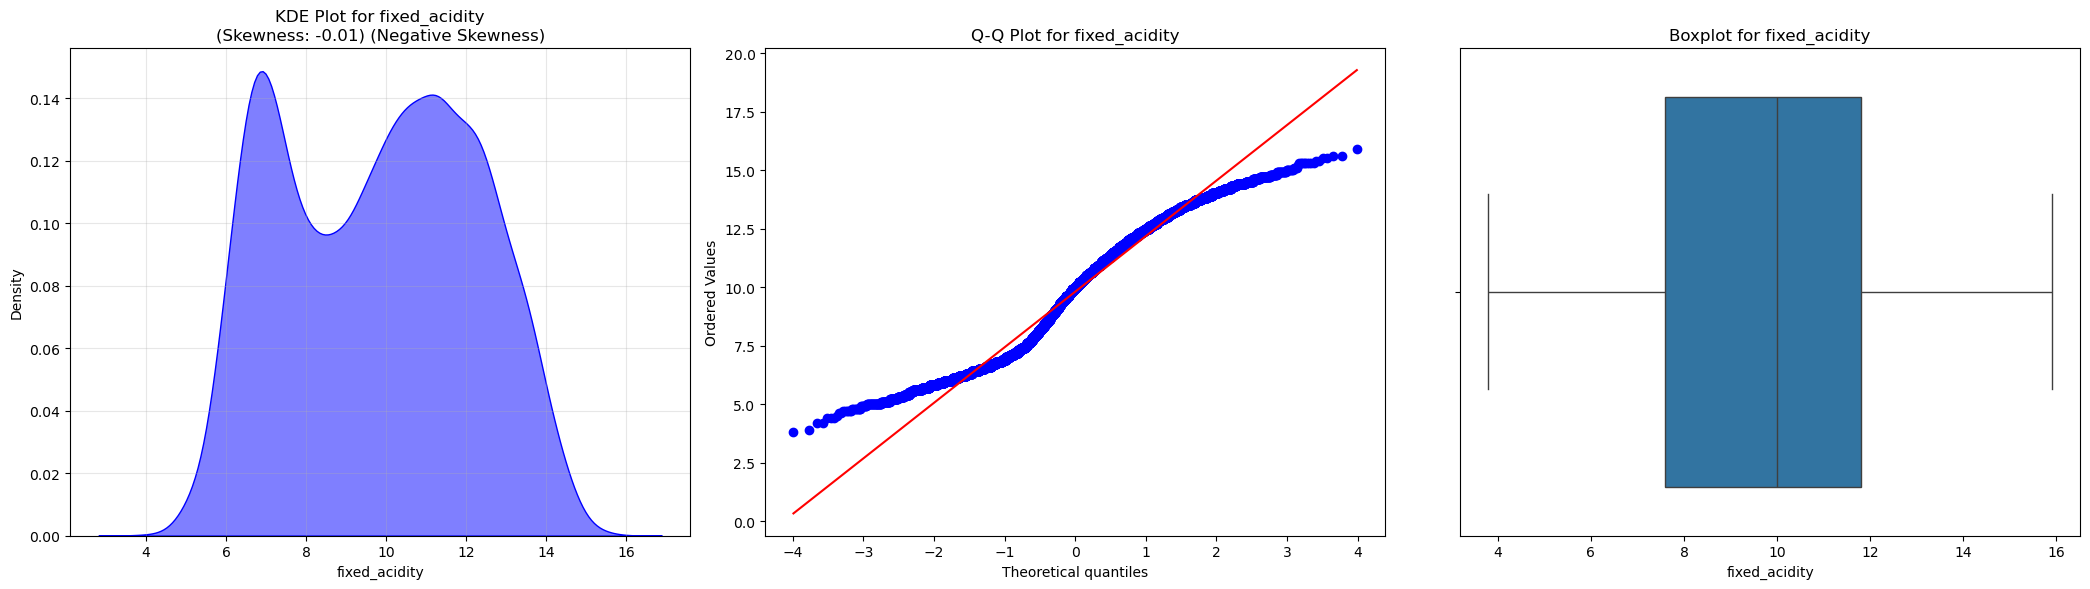

volatile_acidity: Skewness = -0.18 (Negative Skewness)


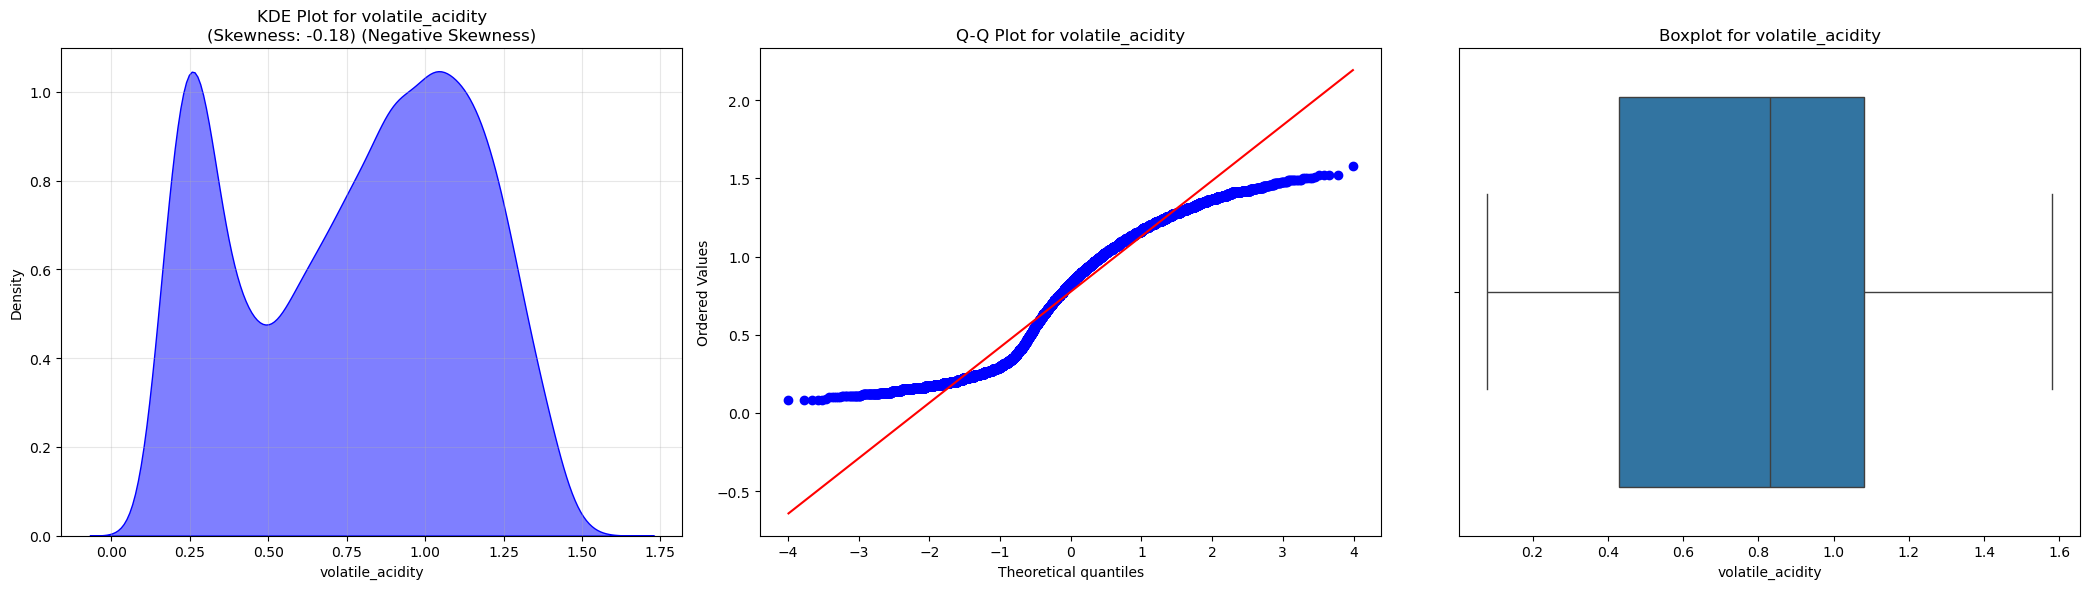

citric_acid: Skewness = -0.22 (Negative Skewness)


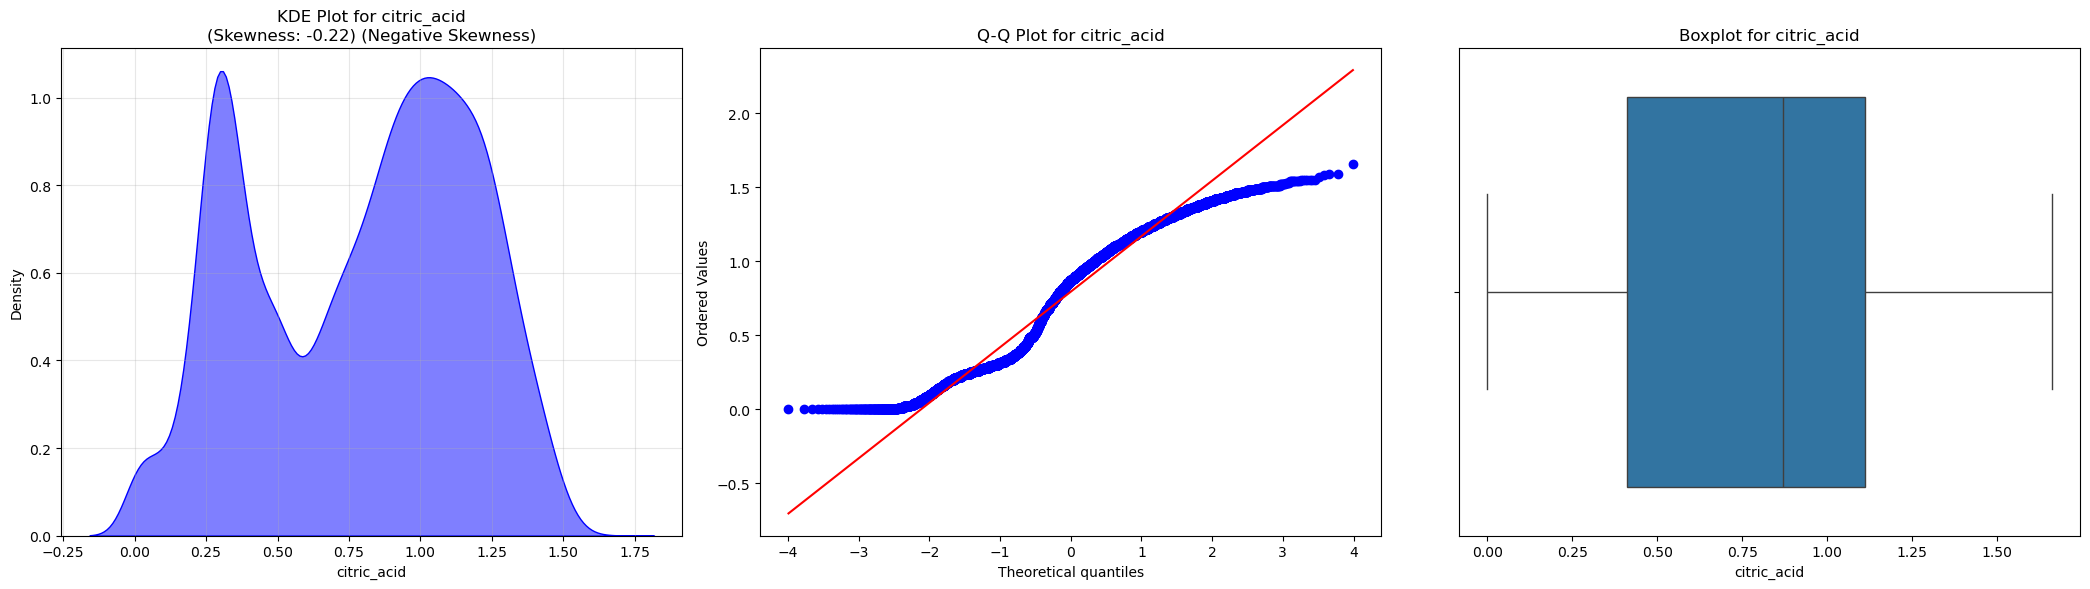

residual_sugar: Skewness = -0.44 (Negative Skewness)


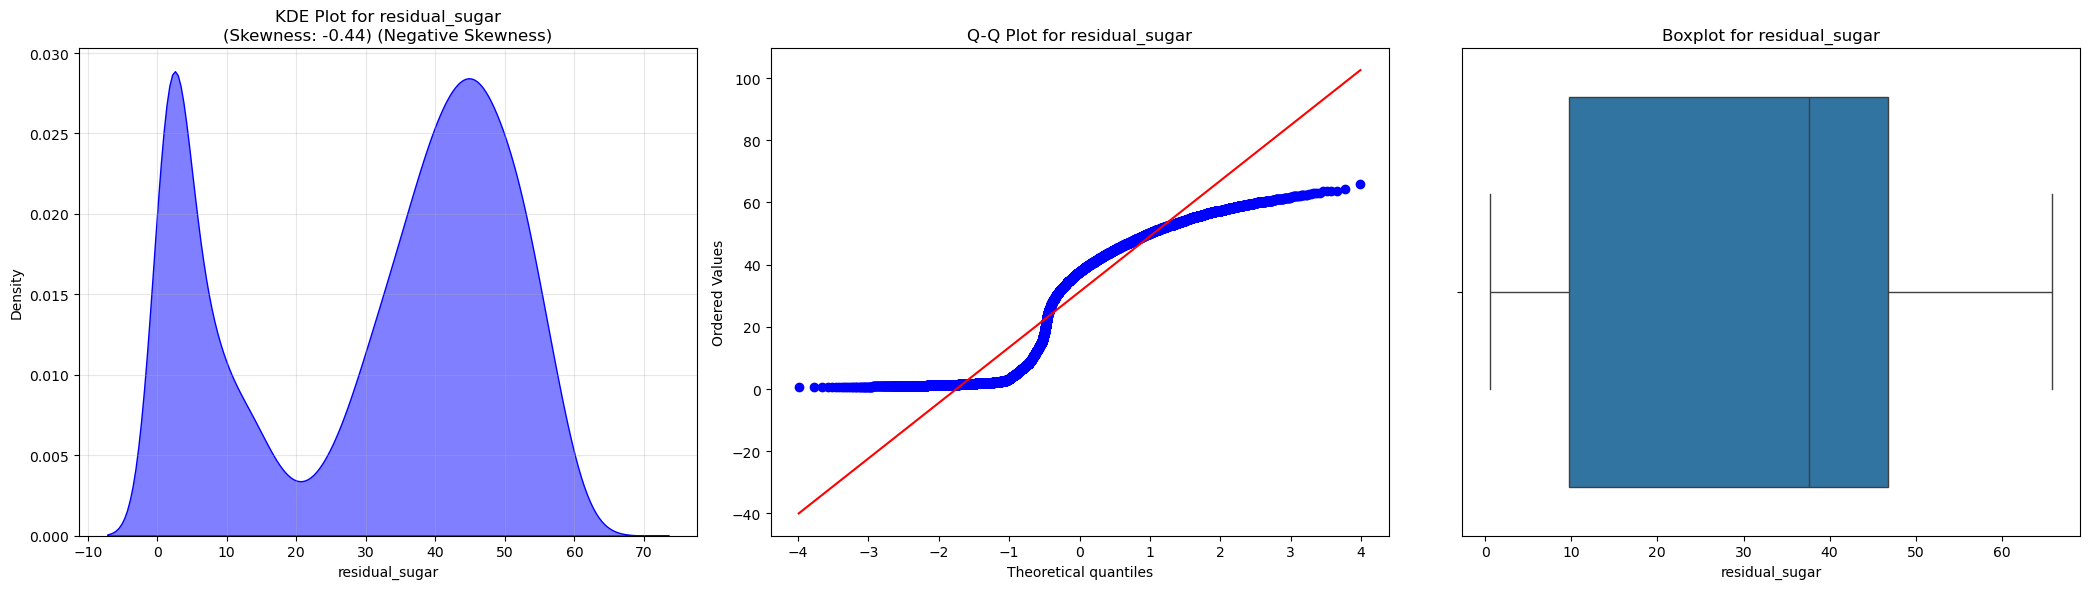

chlorides: Skewness = 0.22 (Positive Skewness)


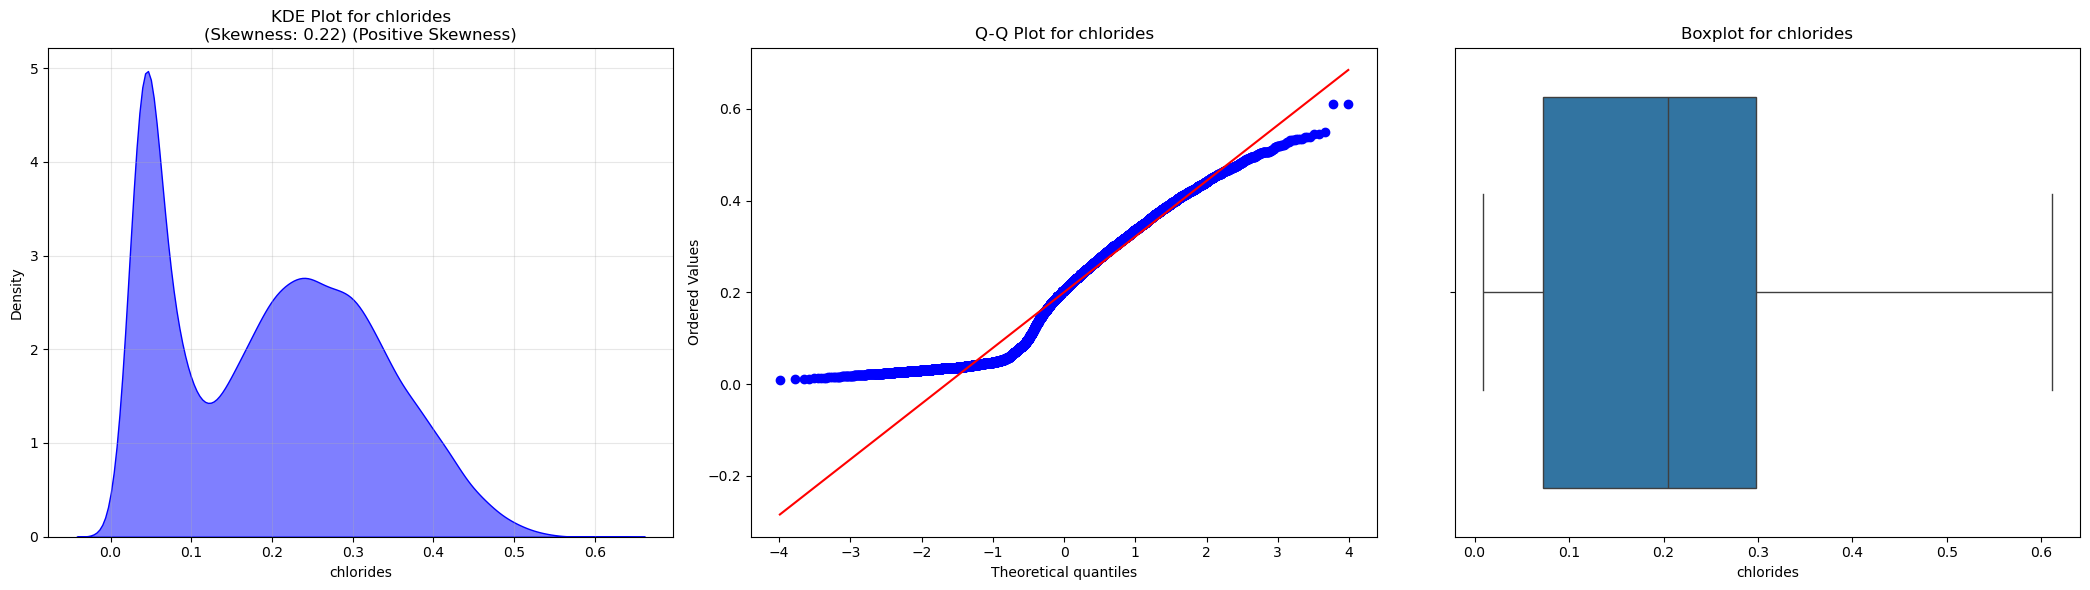

free_sulfur_dioxide: Skewness = -0.19 (Negative Skewness)


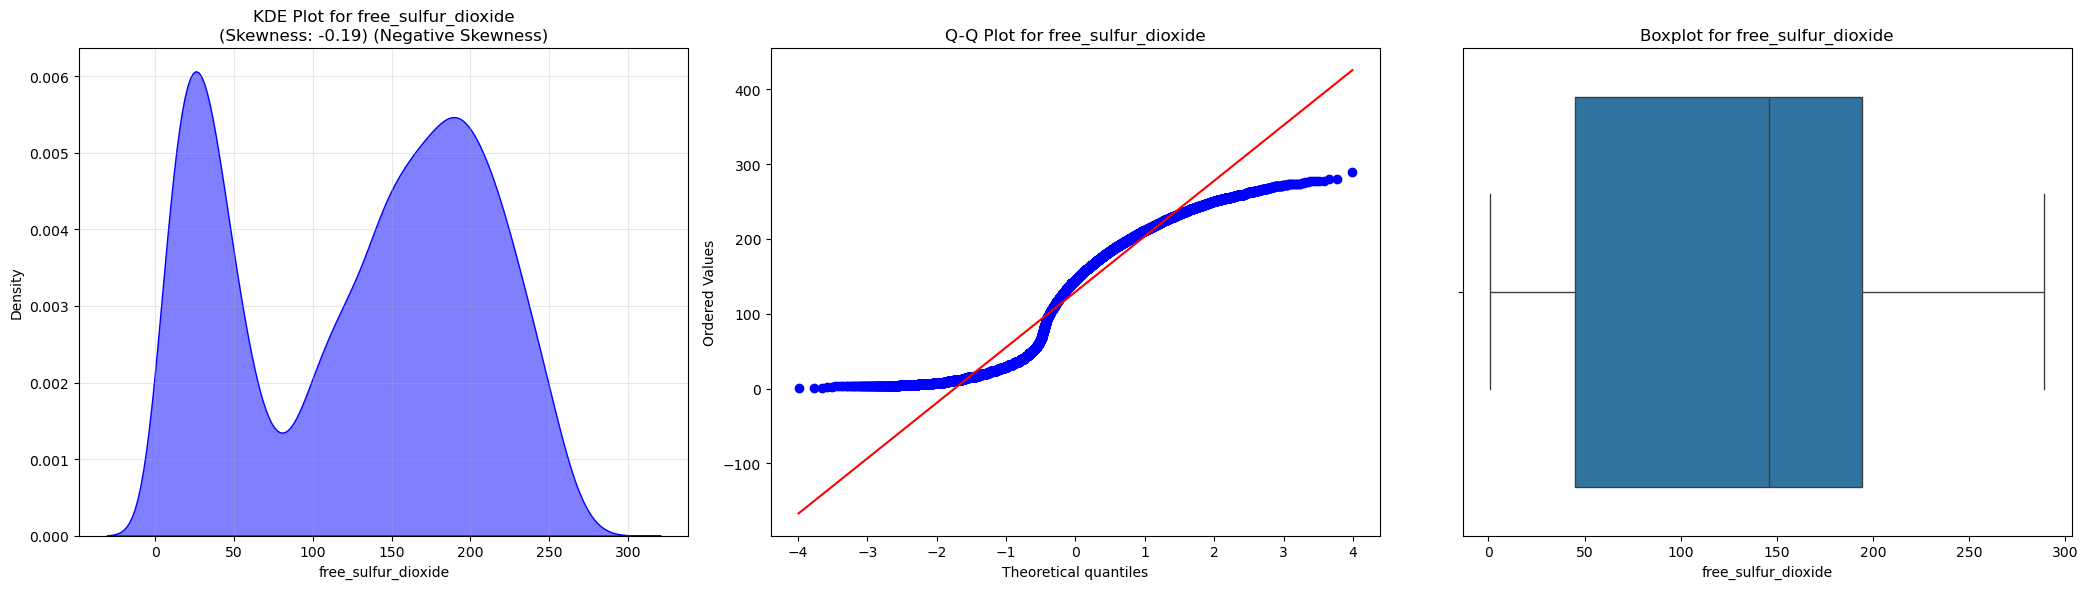

total_sulfur_dioxide: Skewness = -0.29 (Negative Skewness)


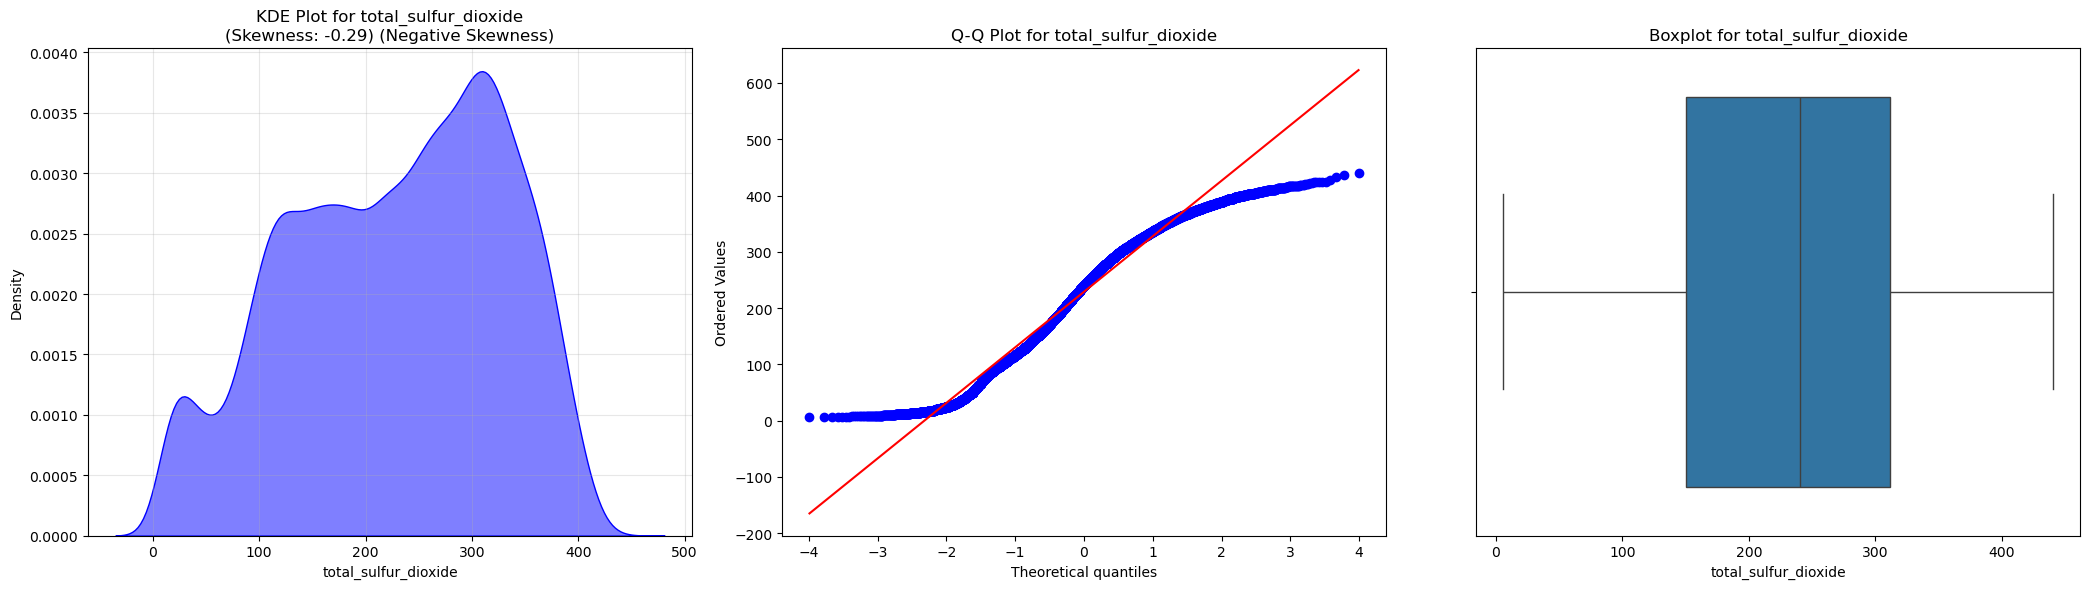

density: Skewness = -0.16 (Negative Skewness)


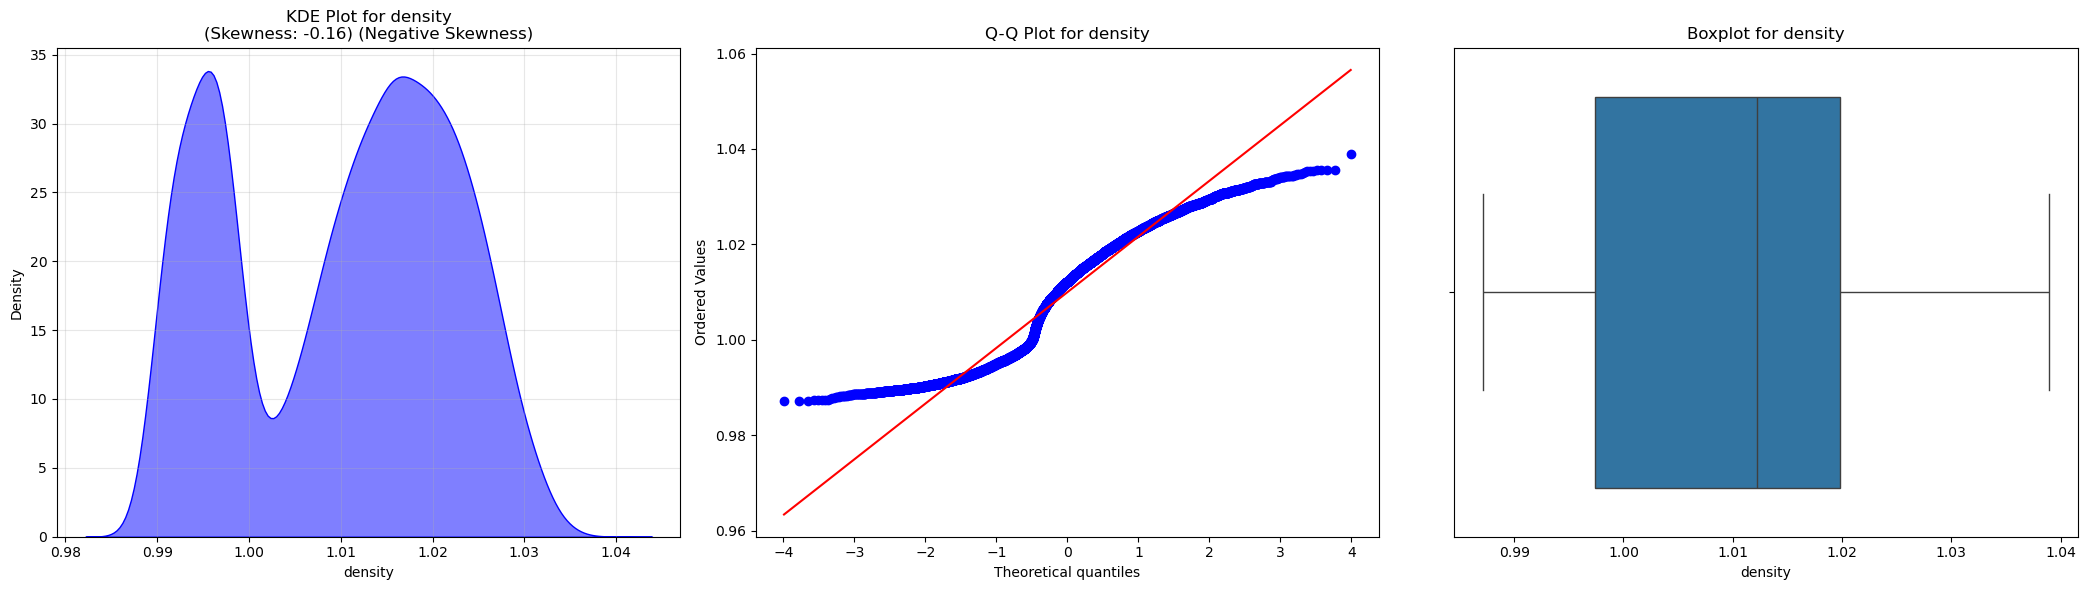

pH: Skewness = 0.40 (Positive Skewness)


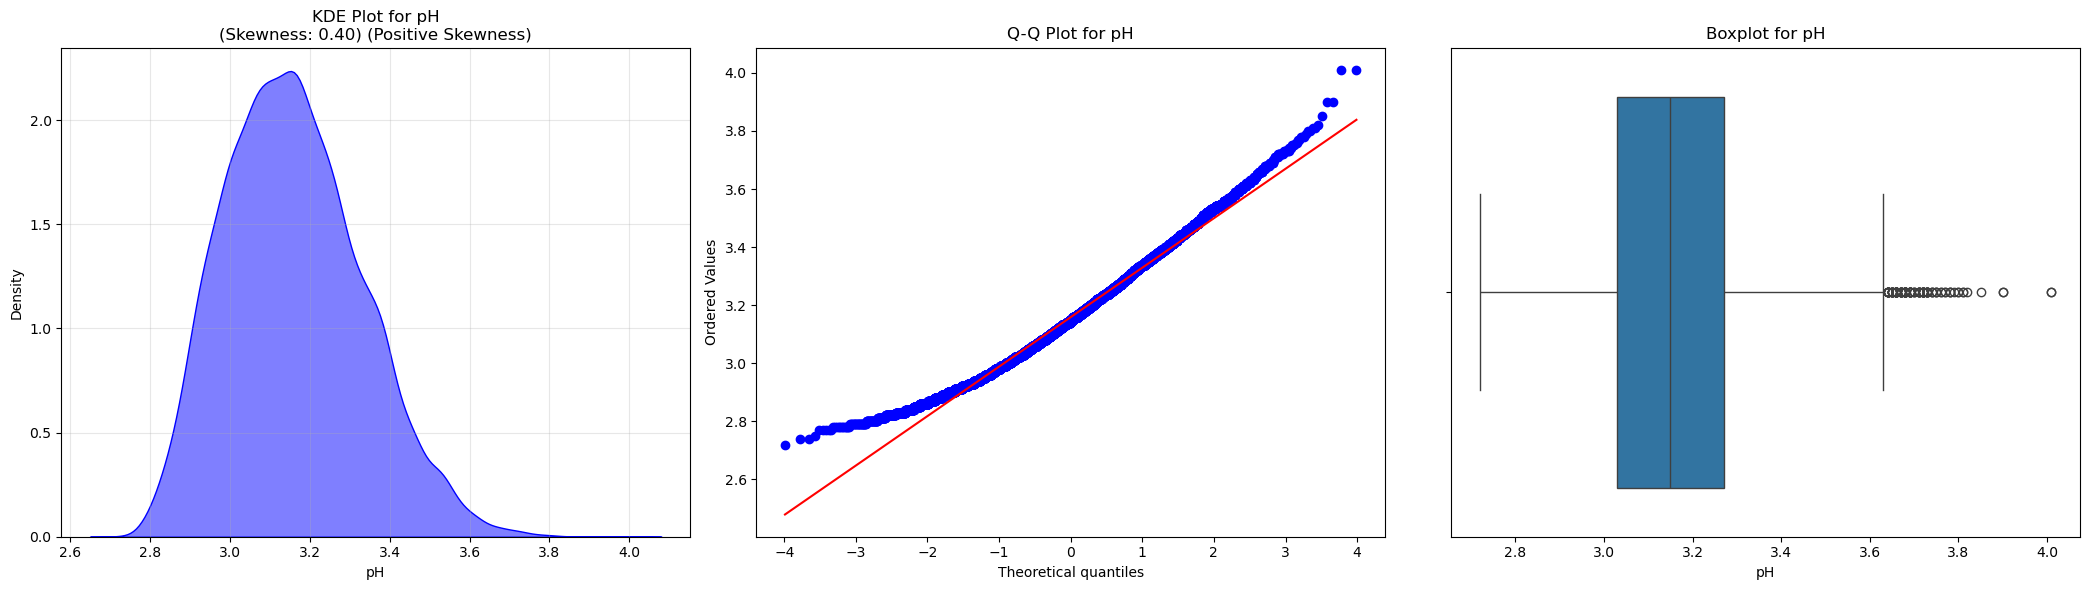

sulphates: Skewness = -0.09 (Negative Skewness)


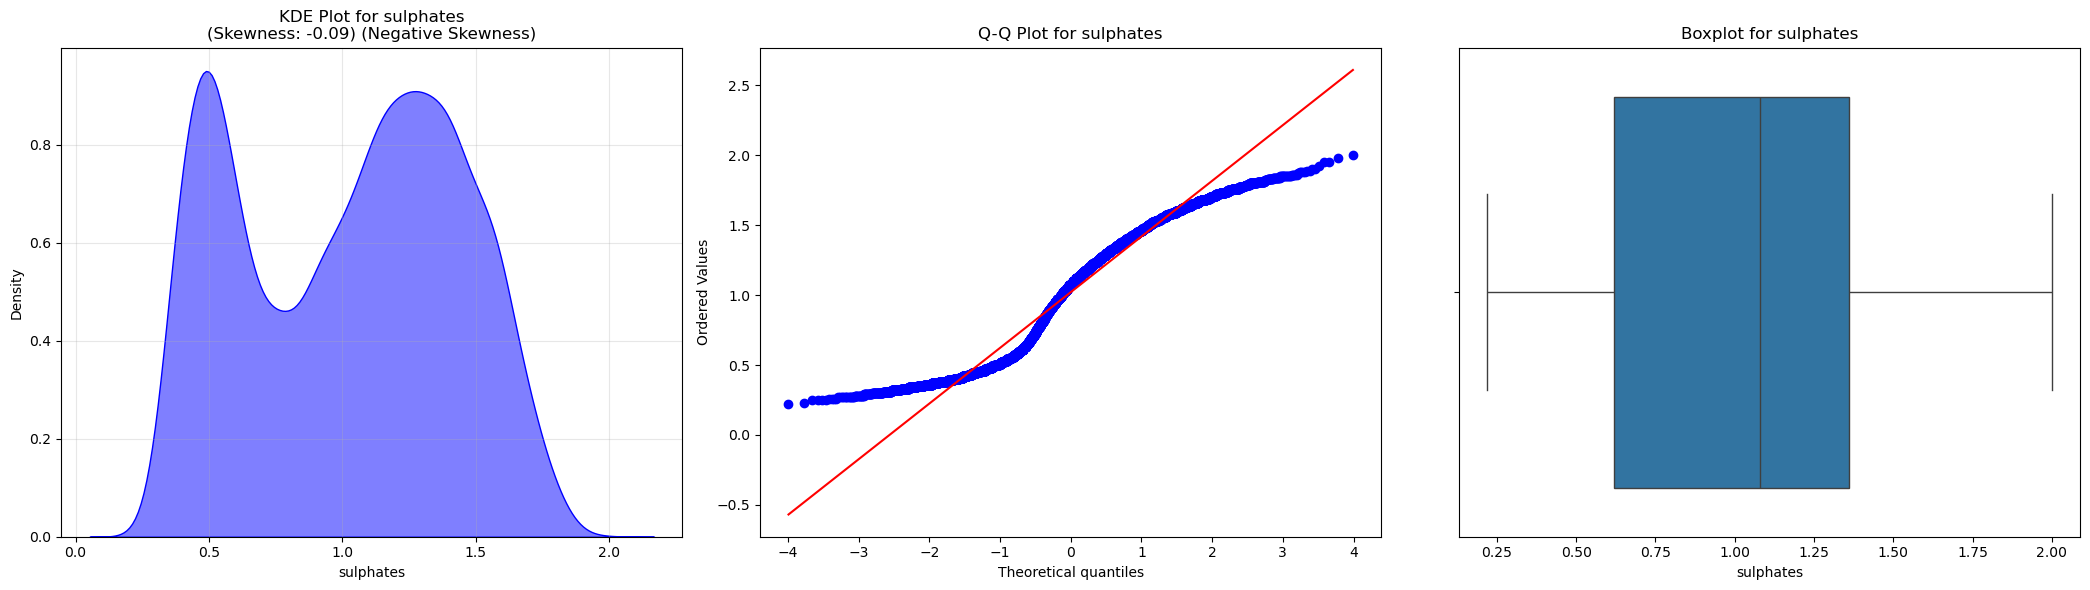

alcohol: Skewness = -0.12 (Negative Skewness)


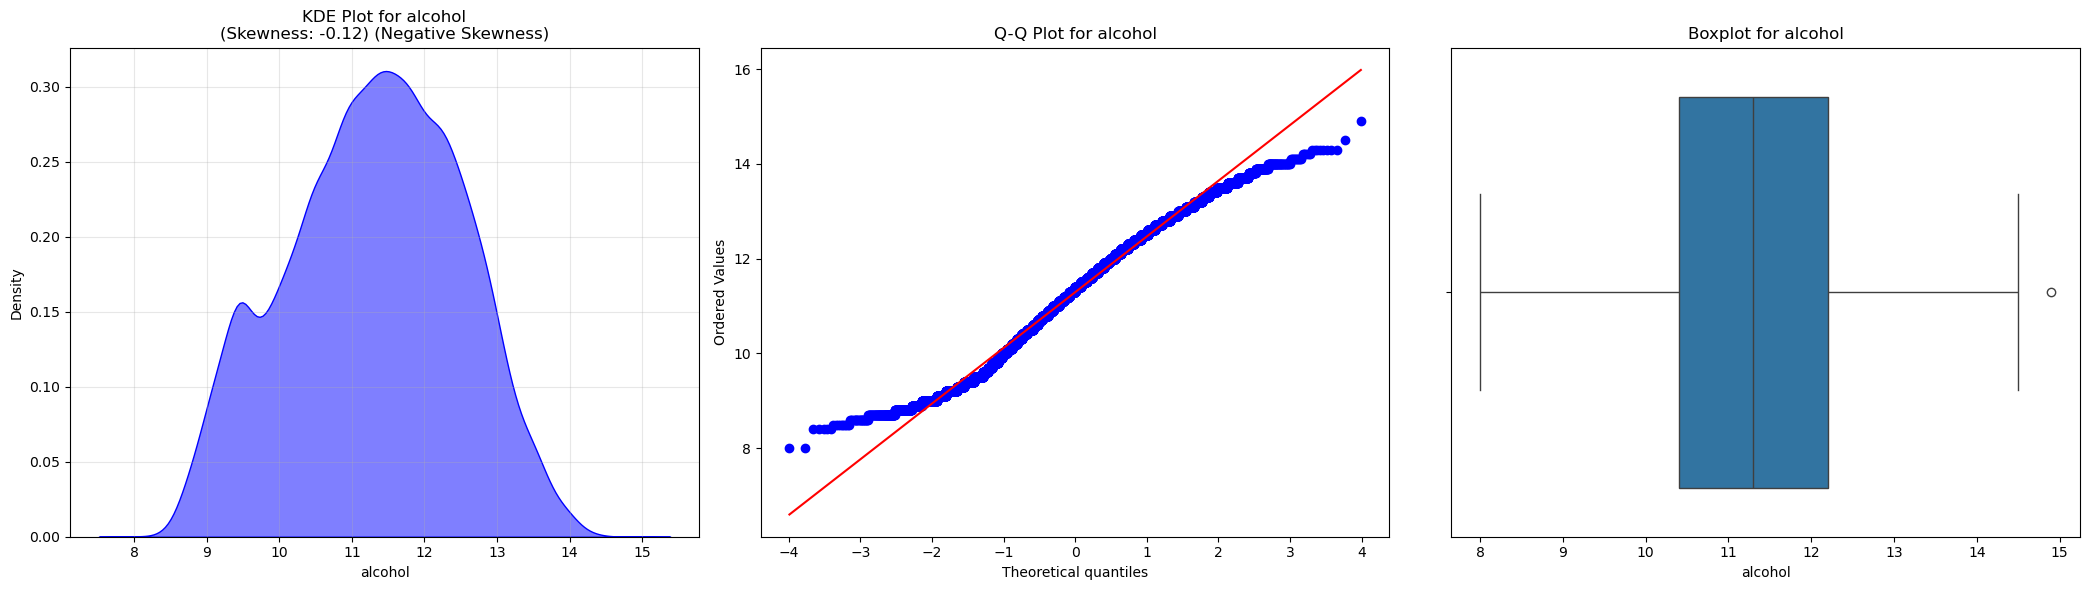

In [11]:
All_plot(X)

In [12]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Make a copy to avoid modifying the original DataFrame

    # Loop through numeric columns and cap outliers based on IQR
    for column in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper bound
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped

In [13]:
X_new = cap_outliers_iqr(X)

fixed_acidity: Skewness = -0.01 (Negative Skewness)


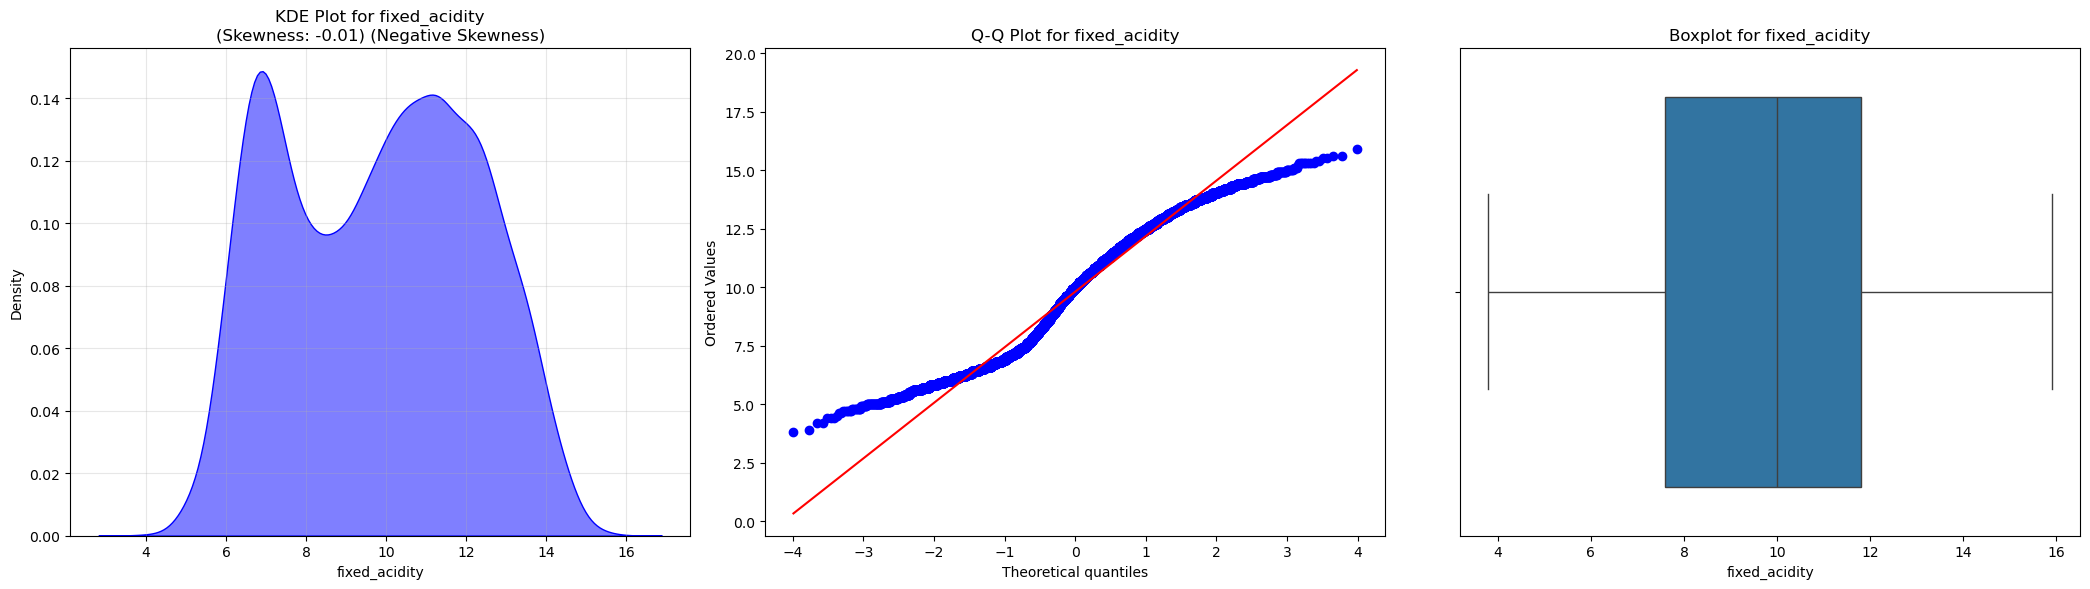

volatile_acidity: Skewness = -0.18 (Negative Skewness)


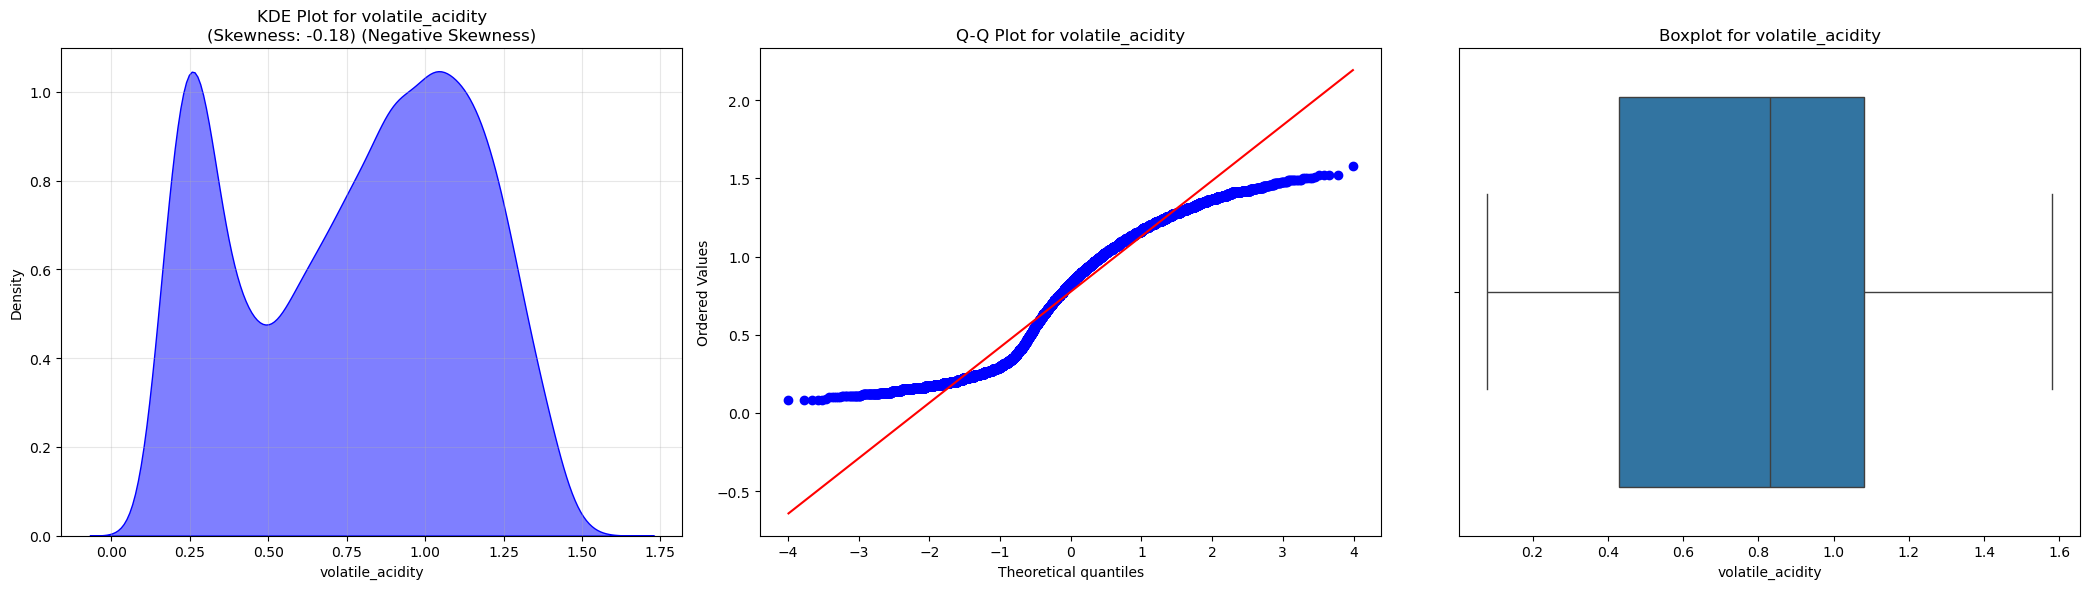

citric_acid: Skewness = -0.22 (Negative Skewness)


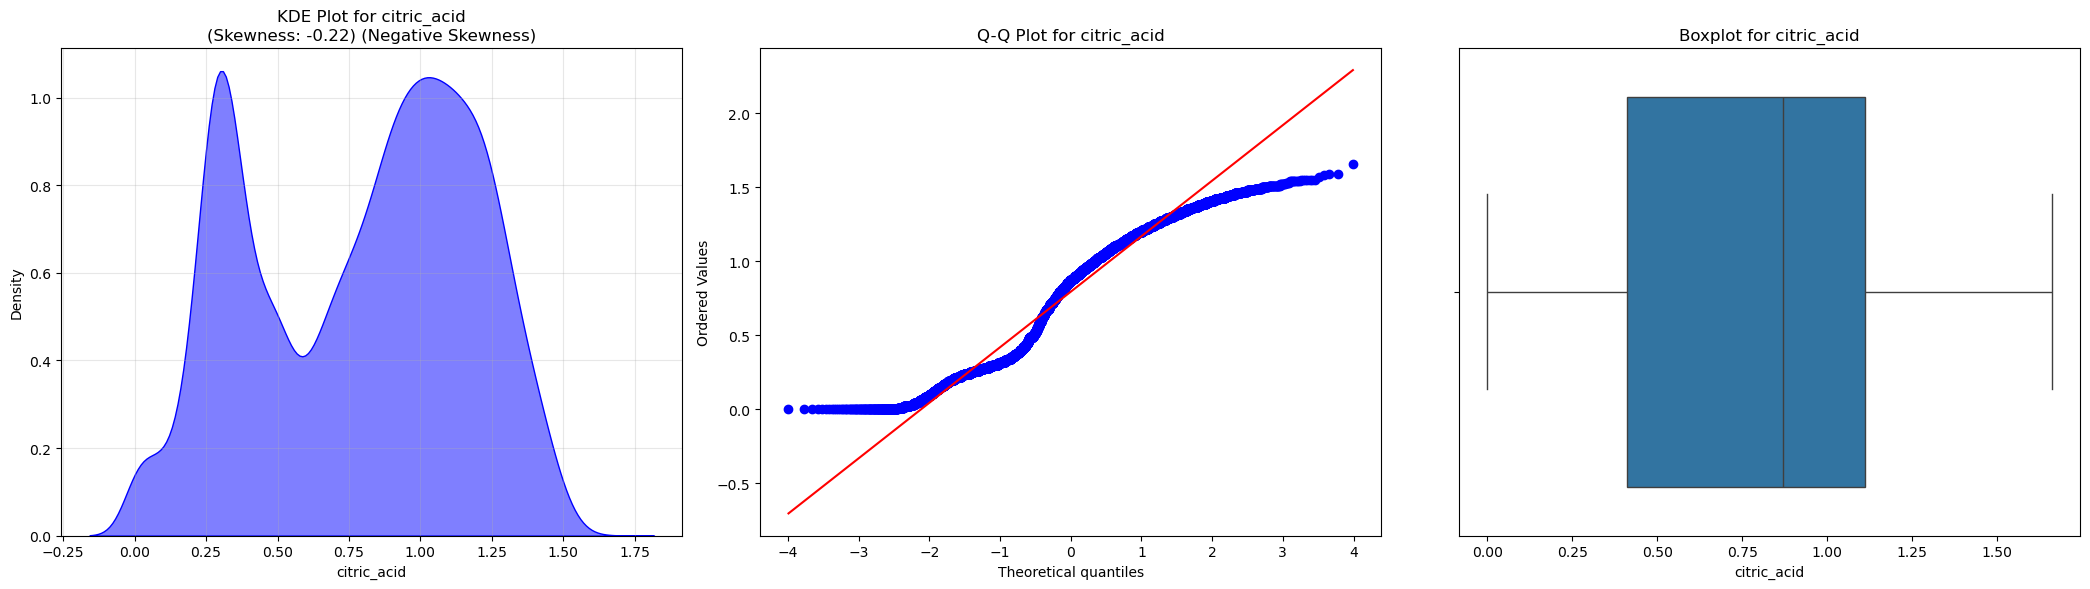

residual_sugar: Skewness = -0.44 (Negative Skewness)


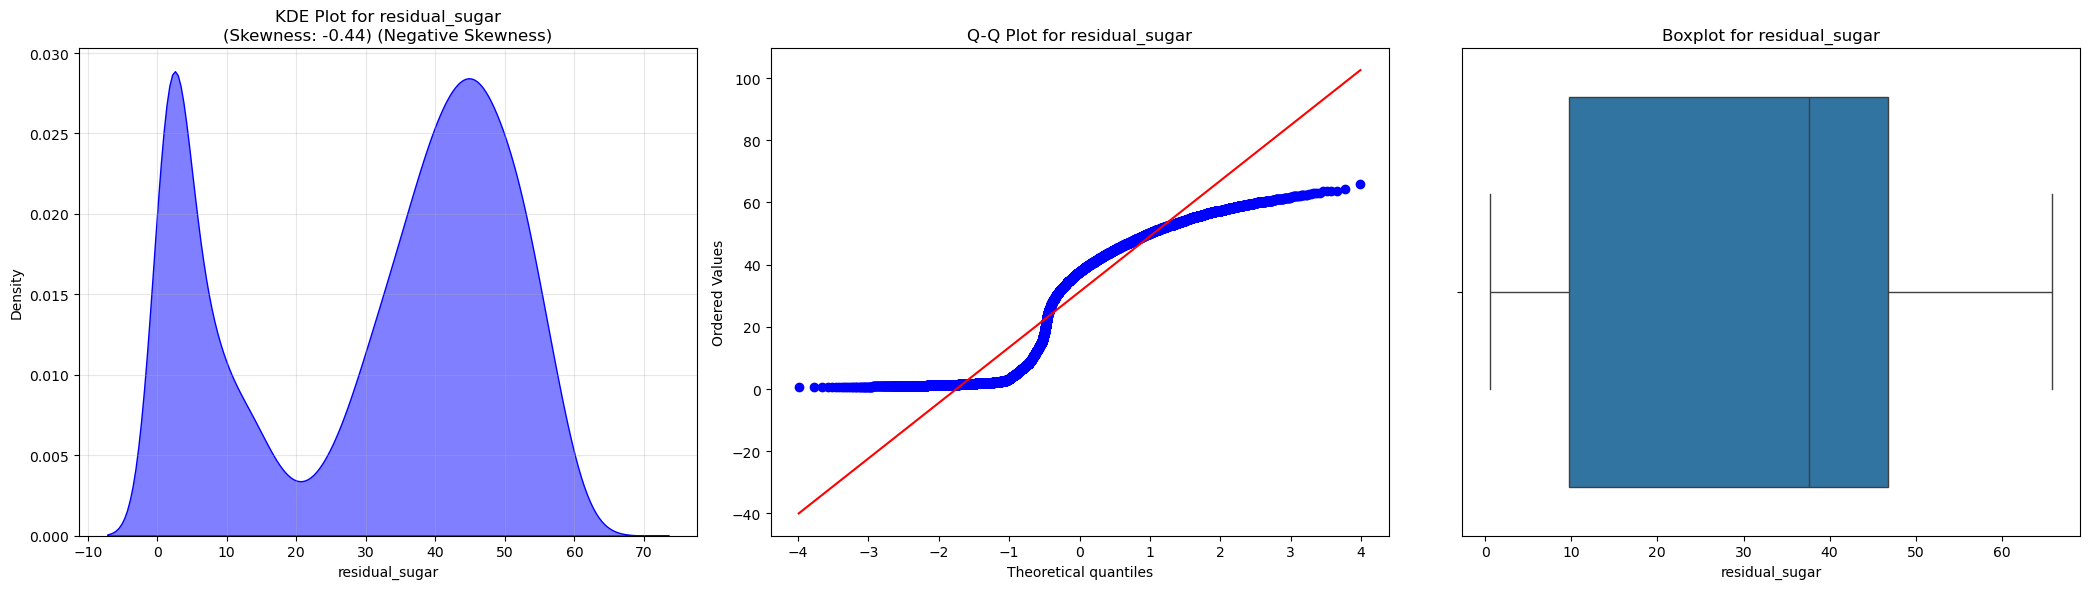

chlorides: Skewness = 0.22 (Positive Skewness)


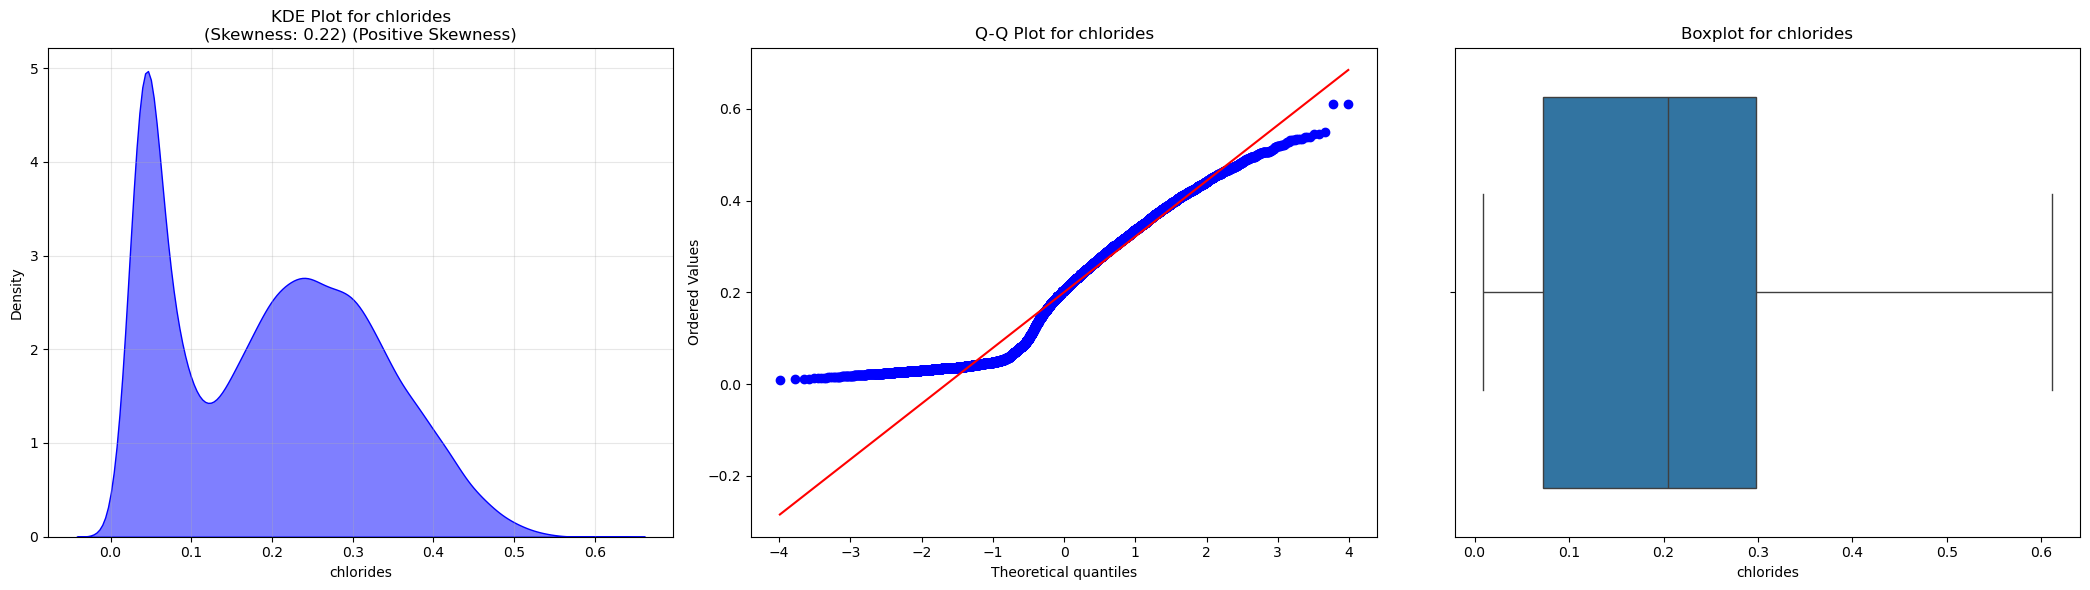

free_sulfur_dioxide: Skewness = -0.19 (Negative Skewness)


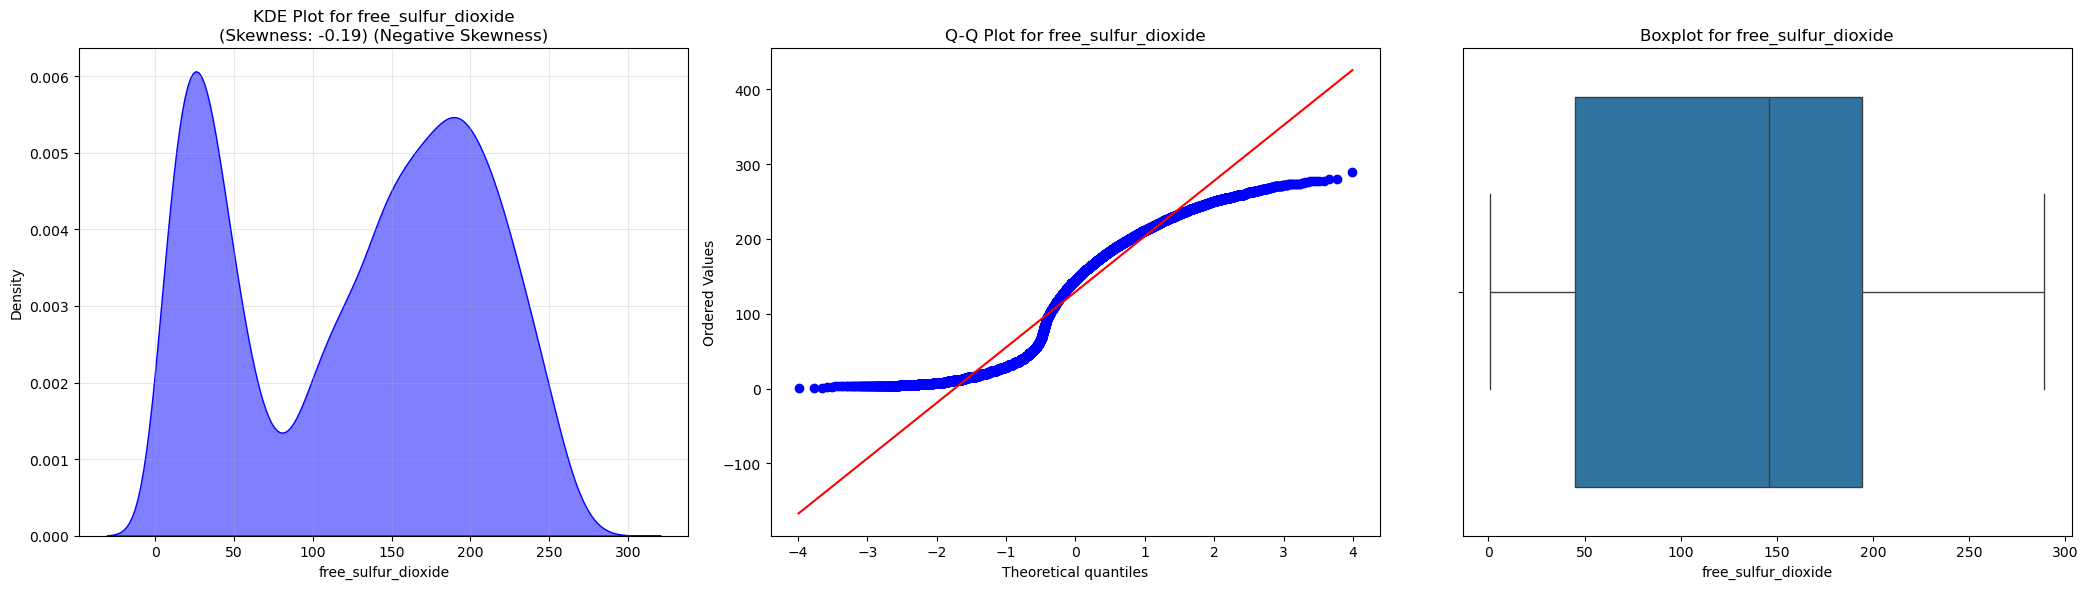

total_sulfur_dioxide: Skewness = -0.29 (Negative Skewness)


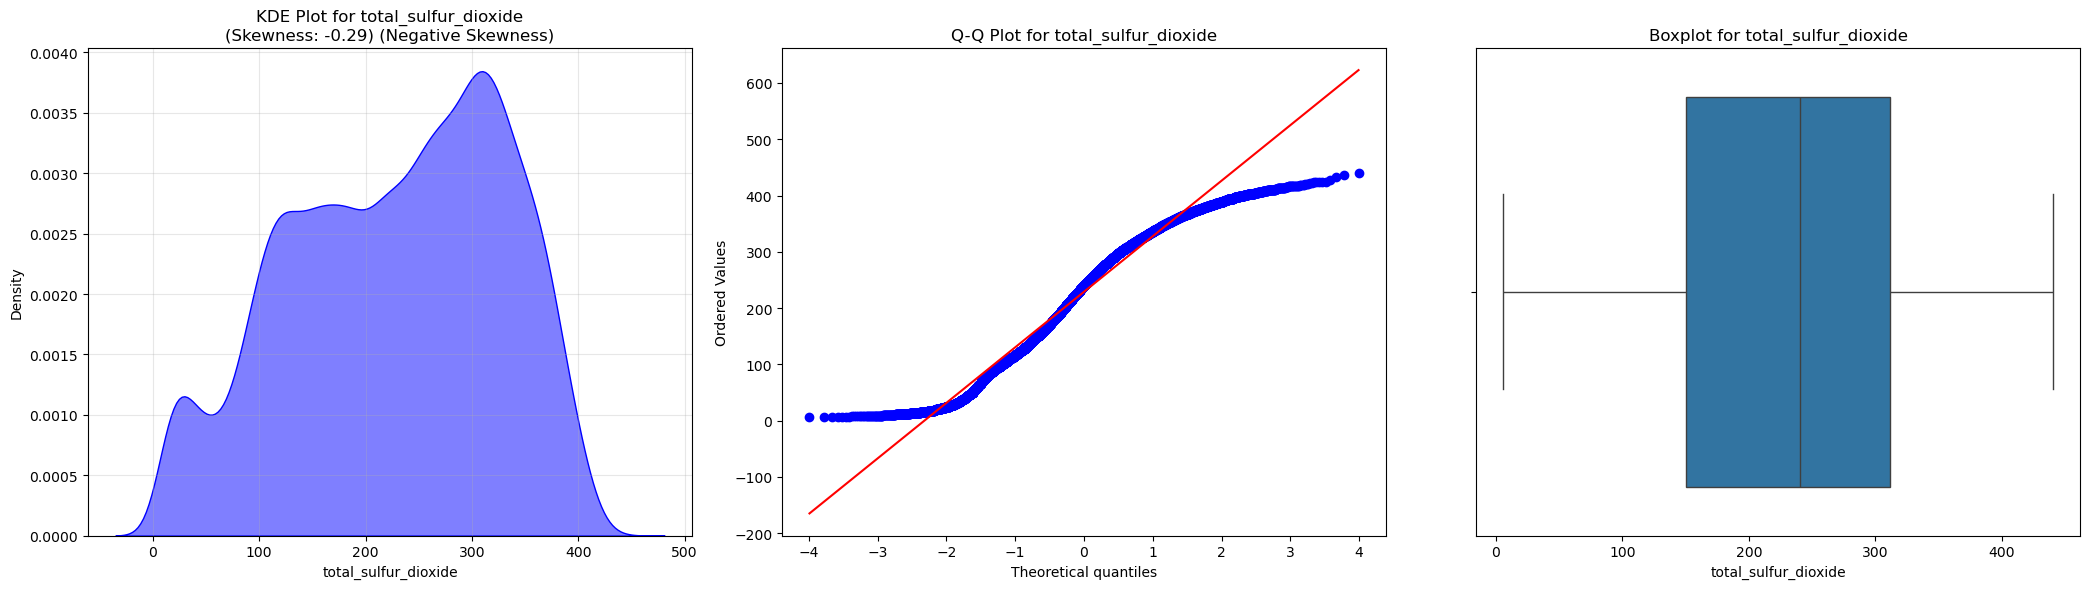

density: Skewness = -0.16 (Negative Skewness)


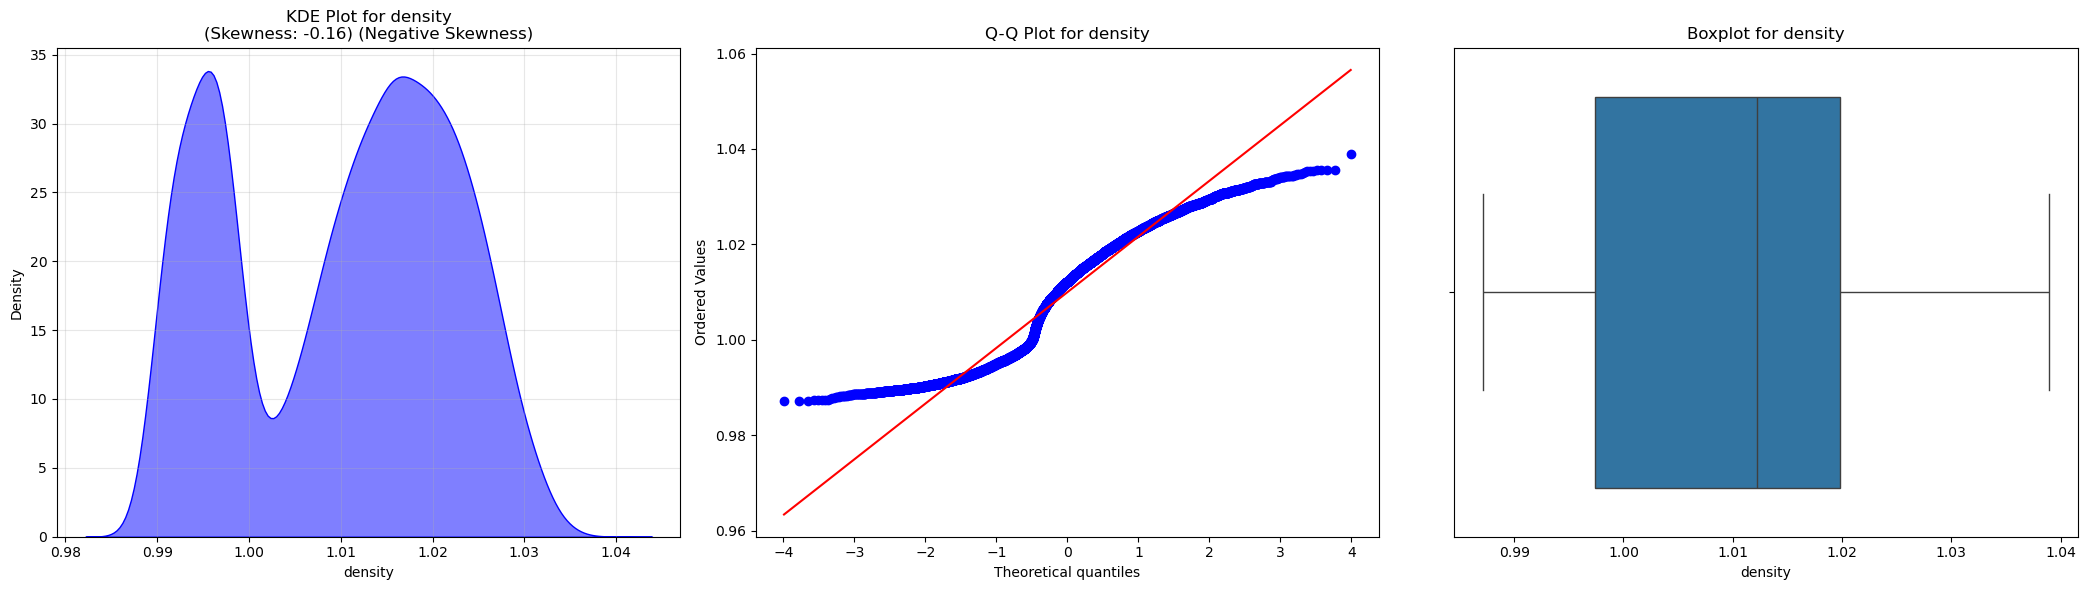

pH: Skewness = 0.34 (Positive Skewness)


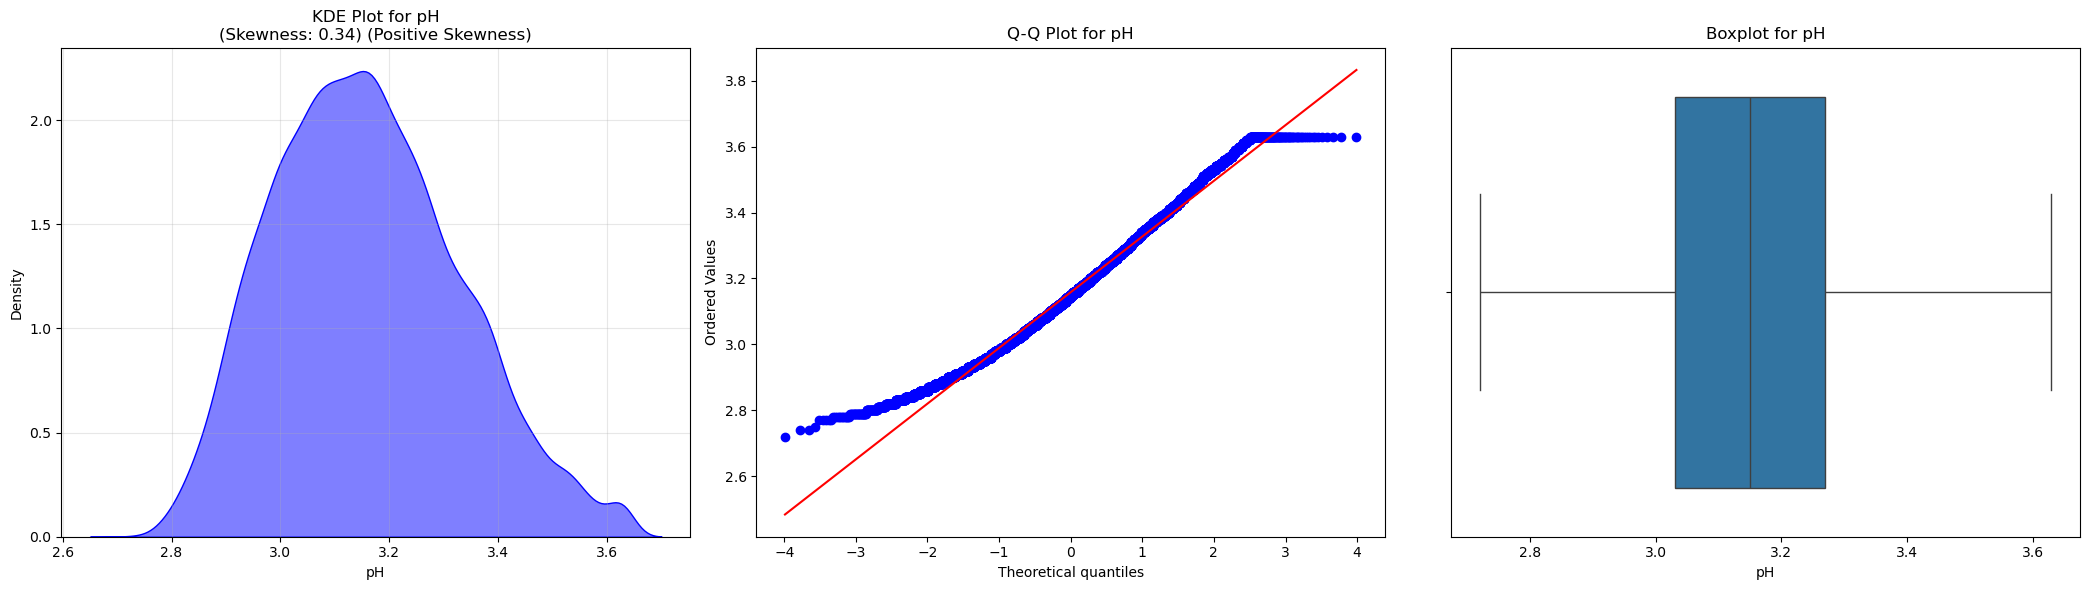

sulphates: Skewness = -0.09 (Negative Skewness)


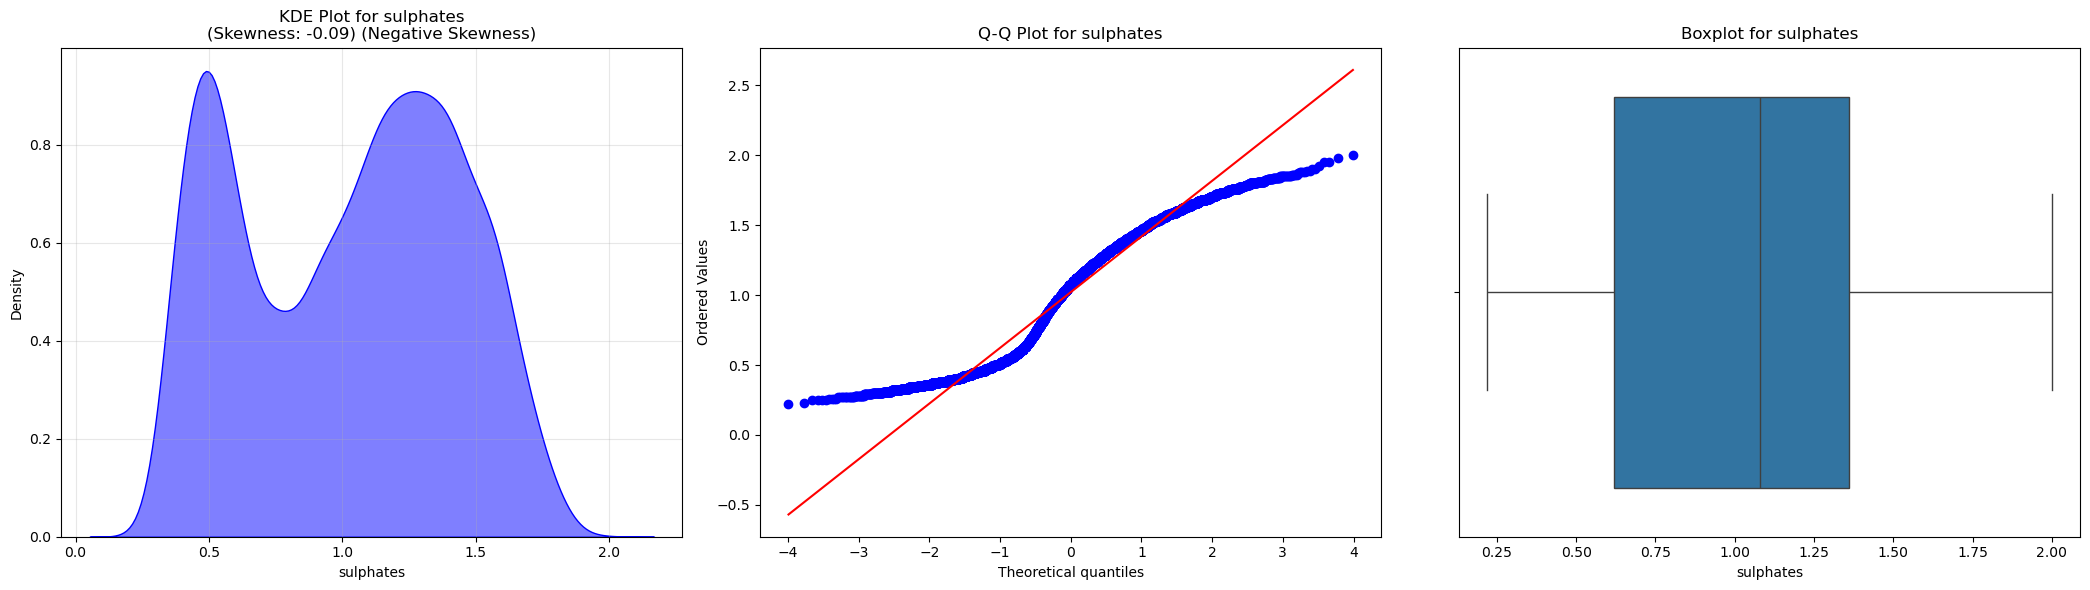

alcohol: Skewness = -0.12 (Negative Skewness)


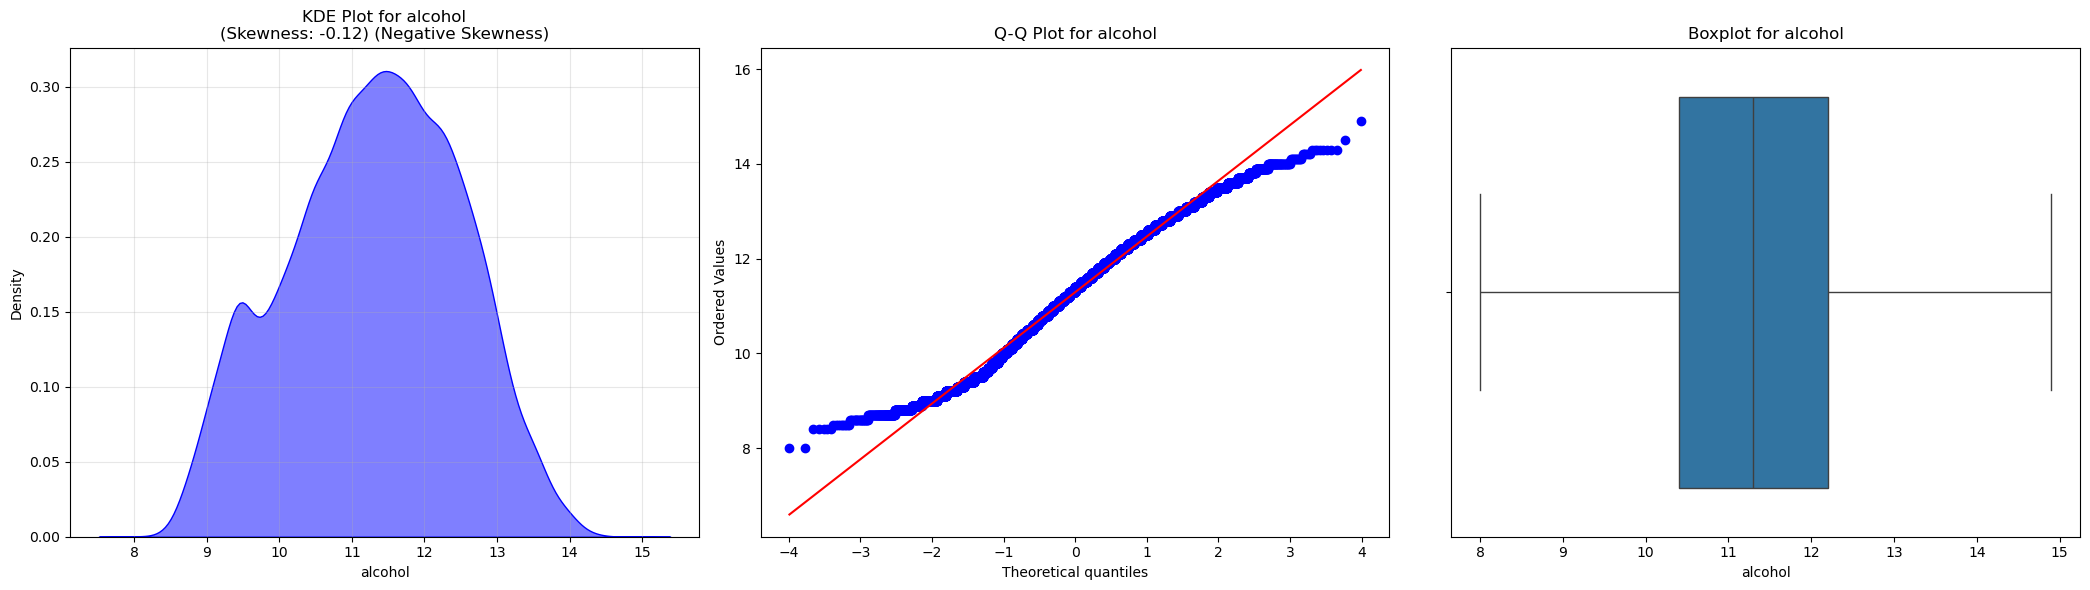

In [14]:
All_plot(X_new)

In [15]:
X.describe()

fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   21000.000000      21000.000000  21000.000000    21000.000000   
mean        9.797079          0.774796      0.793870       31.289348   
std         2.413919          0.365015      0.384833       19.015391   
min         3.800000          0.080000      0.000000        0.600000   
25%         7.600000          0.430000      0.410000        9.800000   
50%        10.000000          0.830000      0.870000       37.600000   
75%        11.800000          1.080000      1.110000       46.800000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free_sulfur_dioxide  total_sulfur_dioxide       density  \
count  21000.000000         21000.000000          21000.000000  21000.000000   
mean       0.200245           129.442333            229.008762      1.009972   
std        0.124933            77.167262            100.183265      0.012032   
min        0.009000             1.000000              6.000000      0.987110   
25%        0.072000            45.000000            150.000000      0.997417   
50%        0.205000           145.800000            240.500000      1.012200   
75%        0.298000           194.325000            311.625000      1.019840   
max        0.611000           289.000000            440.000000      1.038980   

                 pH     sulphates       alcohol  
count  21000.000000  21000.000000  21000.000000  
mean       3.158712      1.020641     11.291716  
std        0.171371      0.408304      1.182198  
min        2.720000      0.220000      8.000000  
25%        3.030000      0.620000     10.400000  
50%        3.150000      1.080000     11.300000  
75%        3.270000      1.360000     12.200000  
max        4.010000      2.000000     14.900000

<Axes: >

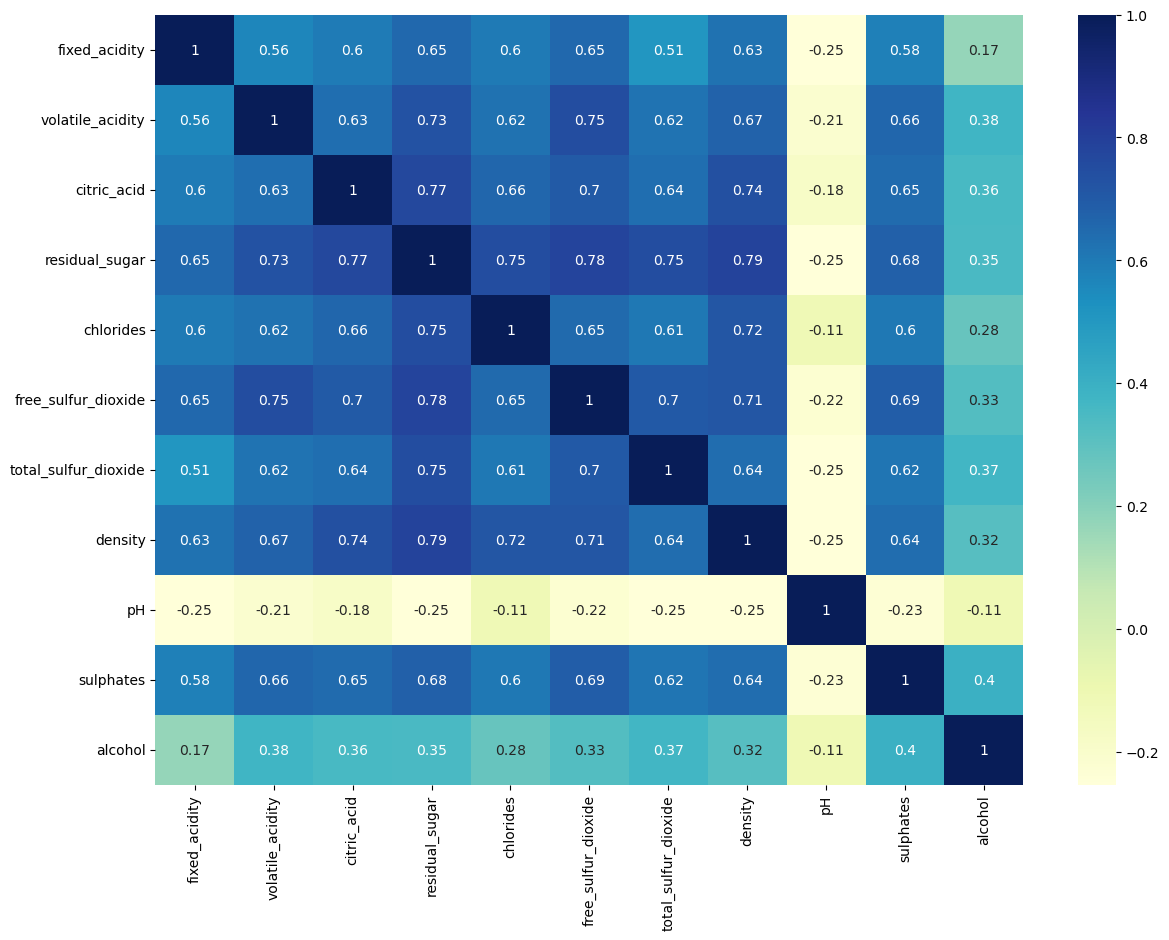

In [16]:
Corr_Matrix = X_new.corr()
fig = plt.figure(figsize=(14, 10))
sns.heatmap(Corr_Matrix,cmap="YlGnBu",annot=True)

In [17]:
X_new.drop(columns=["residual_sugar","free_sulfur_dioxide"],axis=1,inplace=True)
X_new.drop(columns=["citric_acid"],axis=1,inplace=True)
X_new.drop(columns=["chlorides"],axis=1,inplace=True)

<Axes: >

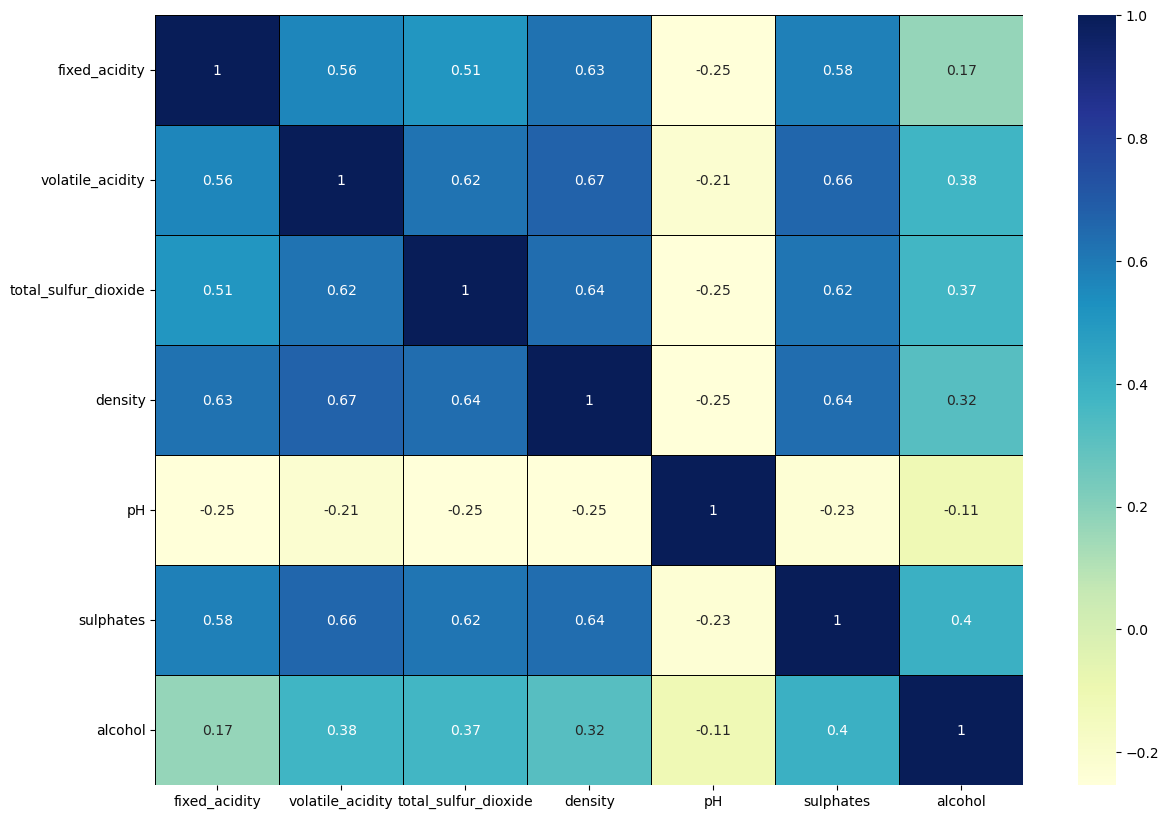

In [18]:
Corr_Matrix = X_new.corr()
fig = plt.figure(figsize=(14, 10))
sns.heatmap(Corr_Matrix,cmap="YlGnBu",annot=True,linecolor='black',linewidths=0.6)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
accuracy_list_test = []
accuracy_list_train = []
for i in range(1,31,2):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance', p=2, algorithm='ball_tree' ,leaf_size=30,metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_predict_test = knn.predict(X_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_predict_test)
    accuracy_list_test.append(float(accuracy_test))
    accuracy_list_train.append(float(accuracy_train))
    print("K =",i," ,Test accuracy =",accuracy_test," ,Train accuracy =",accuracy_train)
avg_accuracy_test = np.mean(accuracy_list_test)
avg_accuracy_train = np.mean(accuracy_list_train)
max_acc_test =np.max(accuracy_list_test) 
max_acc_train =np.max(accuracy_list_train) 
print("Average Accuracy Test =", avg_accuracy_test,"Average Accuracy Train =", avg_accuracy_train," ,Max Test Accuracy =",max_acc_test," ,Max Train Accuracy =",max_acc_train)

K = 1  ,Test accuracy = 0.575952380952381  ,Train accuracy = 1.0
K = 3  ,Test accuracy = 0.5880952380952381  ,Train accuracy = 1.0
K = 5  ,Test accuracy = 0.5969047619047619  ,Train accuracy = 1.0
K = 7  ,Test accuracy = 0.6002380952380952  ,Train accuracy = 1.0
K = 9  ,Test accuracy = 0.599047619047619  ,Train accuracy = 1.0
K = 11  ,Test accuracy = 0.5983333333333334  ,Train accuracy = 1.0
K = 13  ,Test accuracy = 0.5942857142857143  ,Train accuracy = 1.0
K = 15  ,Test accuracy = 0.595  ,Train accuracy = 1.0
K = 17  ,Test accuracy = 0.5971428571428572  ,Train accuracy = 1.0
K = 19  ,Test accuracy = 0.5980952380952381  ,Train accuracy = 1.0
K = 21  ,Test accuracy = 0.5997619047619047  ,Train accuracy = 1.0
K = 23  ,Test accuracy = 0.594047619047619  ,Train accuracy = 1.0
K = 25  ,Test accuracy = 0.5961904761904762  ,Train accuracy = 1.0
K = 27  ,Test accuracy = 0.5966666666666667  ,Train accuracy = 1.0
K = 29  ,Test accuracy = 0.5964285714285714  ,Train accuracy = 1.0
Average Accuracy

In [22]:
# Initialize the KNN model (you can adjust n_neighbors)
knn = KNeighborsClassifier(n_neighbors=11,weights='distance', p=2, algorithm='ball_tree' ,leaf_size=30)

In [23]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11, weights='distance')

In [24]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [25]:
y_pred

array([3, 8, 5, ..., 6, 9, 9], dtype=int64)

In [26]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6004761904761905

In [27]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[391,  39,   7,   2,  24,  51,  52],
       [ 78, 342,  27,  17,  37,  58,  68],
       [ 43,  19, 324, 134,  28,  29,  44],
       [  6,   8, 108, 389,  57,   8,   4],
       [ 59,  46,  21,  88, 297,  48,  66],
       [ 61,  35,   8,  21,  32, 394,  57],
       [ 55,  52,   3,   3,  18,  57, 385]], dtype=int64)

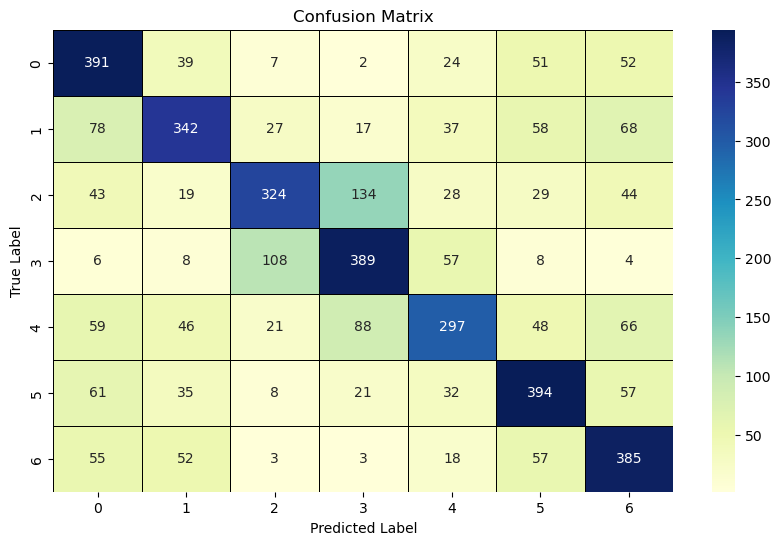

In [29]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm,cmap="YlGnBu",fmt='d',annot=True,linecolor='black',linewidths=0.6)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute F1 Scores
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Print Results
print(f"Micro F1 Score: {f1_micro}")
print(f"Macro F1 Score: {f1_macro}")
print(f"Weighted F1 Score: {f1_weighted}")


Micro F1 Score: 0.6004761904761905
Macro F1 Score: 0.5989989380067906
Weighted F1 Score: 0.5980258928059363
